In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [62]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO')

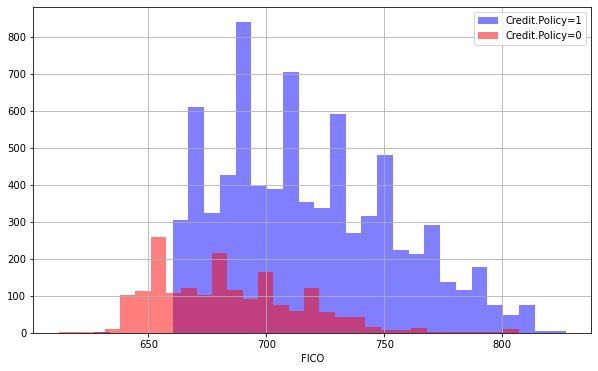

In [7]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

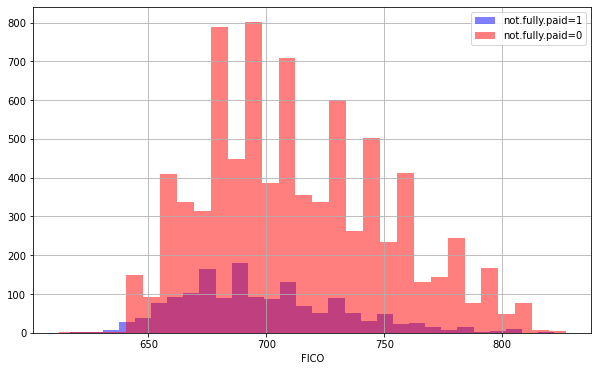

In [8]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

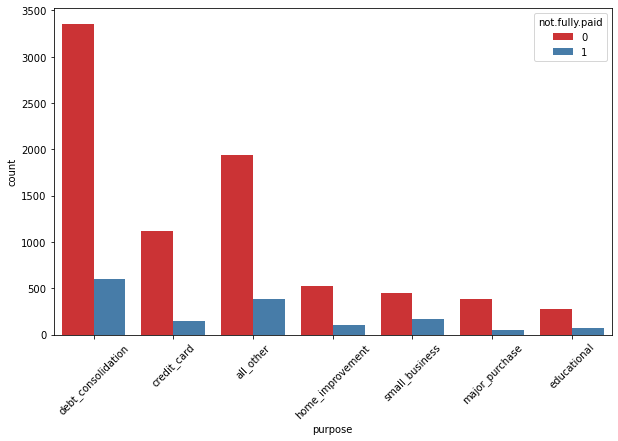

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
chart = sns.countplot(data=df,x="purpose",hue="not.fully.paid",palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

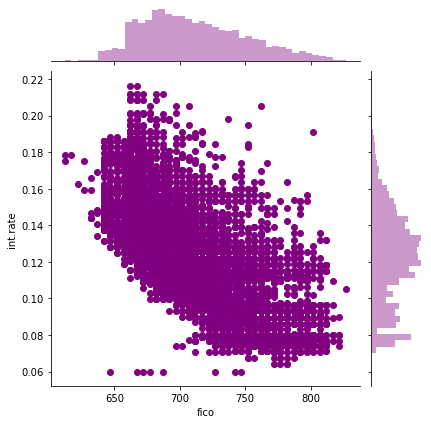

In [10]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple')

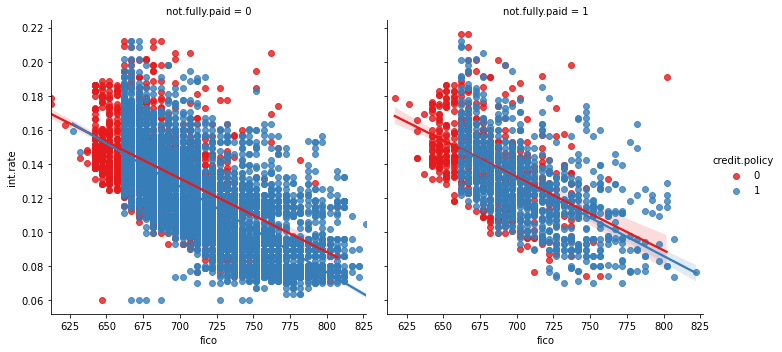

In [11]:
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [14]:
## purpose colum encoding
cat_features = ['purpose']
final_data = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [16]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
feature_columns = list(final_data.columns.difference(['not.fully.paid']))
X = final_data[feature_columns]
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [64]:
y_resampled.value_counts()

1    5648
0    5648
Name: not.fully.paid, dtype: int64

In [40]:
## Oversampling the train_data, features and target

from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)


In [57]:
y_train

8673    0
4496    0
7659    0
8836    1
2198    0
       ..
2895    0
7813    0
905     0
5192    0
235     0
Name: not.fully.paid, Length: 6704, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

scores = cross_val_score(tree, X_resampled, y_resampled, cv=5)

scores

array([0.61902655, 0.79814077, 0.82160248, 0.78087649, 0.7875166 ])

In [46]:
print("Dtree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dtree Accuracy: 0.76 (+/- 0.15)


In [47]:
tree.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [48]:
pred = tree.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2397
           1       0.21      0.31      0.25       477

    accuracy                           0.69      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.74      0.69      0.72      2874



In [50]:
print(confusion_matrix(y_test, pred))

[[1849  548]
 [ 331  146]]


In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

scores_rfc = cross_val_score(rfc, X_resampled, y_resampled, cv=5)

print(scores_rfc)

[0.62920354 0.89729969 0.91013723 0.91102258 0.90261178]


In [52]:
print("RFC Accuracy: %0.2f (+/- %0.2f)" % (scores_rfc.mean(), scores_rfc.std() * 2))

RFC Accuracy: 0.85 (+/- 0.22)


In [54]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [66]:
predict_rfc= rfc.predict(X_test)

In [67]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2397
           1       0.26      0.18      0.21       477

    accuracy                           0.78      2874
   macro avg       0.55      0.54      0.54      2874
weighted avg       0.75      0.78      0.76      2874



In [68]:
print(confusion_matrix(y_test,predict_rfc))

[[2156  241]
 [ 392   85]]


In [65]:
from imblearn.under_sampling import ClusterCentroids

In [72]:
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X_train, y_train)

In [73]:
tree_cc = DecisionTreeClassifier()

scores_cc = cross_val_score(tree_cc, X_cc, y_cc, cv=5)

scores_cc

array([0.78723404, 0.8179669 , 0.7985782 , 0.81753555, 0.78672986])

In [74]:
X_cc.shape

(2112, 18)

In [76]:
y_cc.value_counts()

1    1056
0    1056
Name: not.fully.paid, dtype: int64

In [77]:
tree_cc.fit(X_cc, y_cc)

DecisionTreeClassifier()

In [78]:
pred_cc = tree_cc.predict(X_test)

In [79]:
print(classification_report(y_test,pred_cc))

              precision    recall  f1-score   support

           0       0.85      0.21      0.33      2397
           1       0.17      0.82      0.28       477

    accuracy                           0.31      2874
   macro avg       0.51      0.51      0.31      2874
weighted avg       0.74      0.31      0.32      2874



In [80]:
rfc_cc = RandomForestClassifier(n_estimators=100)
rfc_cc.fit(X_cc, y_cc)

RandomForestClassifier()

In [81]:
pred_rfc_cc = rfc_cc.predict(X_test)

In [82]:
print(classification_report(y_test, pred_rfc_cc))

              precision    recall  f1-score   support

           0       0.87      0.15      0.26      2397
           1       0.17      0.88      0.29       477

    accuracy                           0.27      2874
   macro avg       0.52      0.52      0.27      2874
weighted avg       0.75      0.27      0.26      2874



In [88]:
print(confusion_matrix(y_test, pred_rfc_cc))

[[ 360 2037]
 [  55  422]]


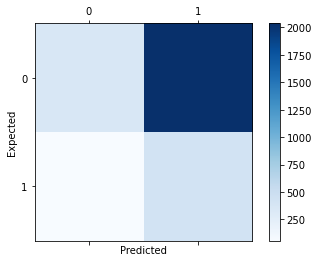

In [92]:
conf_mat = confusion_matrix(y_test, pred_rfc_cc)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [102]:
cm = confusion_matrix(y_test, pred_rfc_cc)

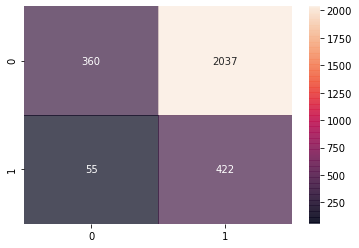

In [104]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", alpha = 0.7)